In [1]:
import pandas as pd
import numpy as np
pd.set_option('max_columns', 4, 'max_rows', 10, 'max_colwidth', 12)

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
mkdir tmp

# 탐색적 데이터 분석
---
- 요악 통계량 - describe()
- 열 형식
- category data
- 연속 데이터
- 범주간의 연속 값 비교
- 두 개의 연속 열 비교
- 범주 값과 범주 값 비교
- pandas 프로파일링 라이브러리

## 요약 통계량
---
평균, 분위수, 표준편차   
descrtbe()로 한번에

In [5]:
fueleco = pd.read_csv('../../../data/vehicles.csv.zip',low_memory=False)
fueleco.head()

FileNotFoundError: [Errno 2] No such file or directory: '../data/vehicles.csv.zip'

In [21]:
# mean(), max(), quantile()
fueleco.mean()

barrels08         17.442712
barrelsA08         0.219276
charge120          0.000000
charge240          0.029630
city08            18.077799
                   ...     
youSaveSpend   -3459.572645
charge240b         0.005869
phevCity           0.094703
phevHwy            0.094269
phevComb           0.094141
Length: 60, dtype: float64

In [19]:
# 전체 통계
fueleco.describe().T
# include : datatype를 제한하여 통계
fueleco.describe(include = object).T
# exclude도 가능
# fueleco.describe(exclude = int).T

,count,unique,top,freq
drive,37912,7,Front-Wh...,13653
eng_dscr,23431,545,(FFS),8827
fuelType,39101,14,Regular,25620
fuelType1,39101,6,Regular ...,26931
make,39101,134,Chevrolet,3900
...,...,...,...,...
c240Dscr,53,5,standard...,42
c240bDscr,51,4,80 amp d...,42
createdOn,39101,195,Tue Jan ...,34199
modifiedOn,39101,68,Tue Jan ...,29438


## 열형식

In [22]:
# 행 방향
fueleco.dtypes

barrels08     float64
barrelsA08    float64
charge120     float64
charge240     float64
city08          int64
               ...   
modifiedOn     object
startStop      object
phevCity        int64
phevHwy         int64
phevComb        int64
Length: 83, dtype: object

In [25]:
# 열 방향
fueleco.dtypes.value_counts()

float64    32
int64      27
object     23
bool        1
dtype: int64

In [31]:
# int64 타입만 select
fueleco.select_dtypes('int64').describe().T

,count,mean,...,75%,max
city08,39101.0,18.077799,...,20.0,150.0
cityA08,39101.0,0.569883,...,0.0,145.0
co2,39101.0,72.538989,...,-1.0,847.0
co2A,39101.0,5.543950,...,-1.0,713.0
comb08,39101.0,20.323828,...,23.0,136.0
...,...,...,...,...,...
year,39101.0,2000.635406,...,2010.0,2018.0
youSaveSpend,39101.0,-3459.572645,...,-1500.0,5250.0
phevCity,39101.0,0.094703,...,0.0,97.0
phevHwy,39101.0,0.094269,...,0.0,81.0


### 메모리 줄이기

In [33]:
np.iinfo(np.int8)
np.iinfo(np.int16)

iinfo(min=-32768, max=32767, dtype=int16)

In [35]:
# city07 과 comb08은 150을 넘지 않는다.
# int 64 => 적절한 용량의 int로 변환
fueleco[['city08', 'comb08']].info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39101 entries, 0 to 39100
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   city08  39101 non-null  int64
 1   comb08  39101 non-null  int64
dtypes: int64(2)
memory usage: 611.1 KB


In [37]:
fueleco[['city08', 'comb08']].assign(city08=fueleco.city08.astype(np.int16),
          comb08=fueleco.comb08.astype(np.int16)).info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39101 entries, 0 to 39100
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   city08  39101 non-null  int16
 1   comb08  39101 non-null  int16
dtypes: int16(2)
memory usage: 152.9 KB


In [38]:
# category로 변환 : 중복도가 높은 object는 category로 변환하면 메모리 절약
# 중복도가 낮으면 카디널리티가 높다라고 표현
# ex)_ : 성별, 제작자 등등

# 단적으로 확인하기
import sys
print(sys.getsizeof('안'))
print(sys.getsizeof('녕'))
print(sys.getsizeof('하'))
print(sys.getsizeof('세'))
print(sys.getsizeof('요'))

In [ ]:
print(sys.getsizeof('안녕하세요'))

In [45]:
# 고유한 값의 수 nunique()
# nunique() = len(unique())
fueleco.make.nunique()

134

In [48]:
fueleco[['model']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39101 entries, 0 to 39100
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   model   39101 non-null  object
dtypes: object(1)
memory usage: 305.6+ KB


In [46]:
fueleco[['make']].assign(make=fueleco.make.astype('category')).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39101 entries, 0 to 39100
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   make    39101 non-null  category
dtypes: category(1)
memory usage: 81.6 KB


In [47]:
fueleco[['model']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39101 entries, 0 to 39100
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   model   39101 non-null  object
dtypes: object(1)
memory usage: 305.6+ KB


In [49]:
fueleco[['model']].assign(model=fueleco.model.astype('category')).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39101 entries, 0 to 39100
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   model   39101 non-null  category
dtypes: category(1)
memory usage: 235.3 KB


## Categorical Data

In [50]:
fueleco.select_dtypes(object).columns

Index(['drive', 'eng_dscr', 'fuelType', 'fuelType1', 'make', 'model',
       'mpgData', 'trany', 'VClass', 'guzzler', 'trans_dscr', 'tCharger',
       'sCharger', 'atvType', 'fuelType2', 'rangeA', 'evMotor', 'mfrCode',
       'c240Dscr', 'c240bDscr', 'createdOn', 'modifiedOn', 'startStop'],
      dtype='object')

In [51]:
fueleco.drive.nunique()

7

In [57]:
# 무작위로 5개를 뽑는데 random_state : 여러번 실행해도 값이 바뀌지 않는다
# random_state=num : num마다 고유 값이 정해져 있음
fueleco.drive.sample(5, random_state=42)

4217     4-Wheel ...
1736     4-Wheel ...
36029    Rear-Whe...
37631    Front-Wh...
1668     Rear-Whe...
Name: drive, dtype: object

In [59]:
# 결측치 %
fueleco.drive.isna().mean() * 100

3.0408429451932175

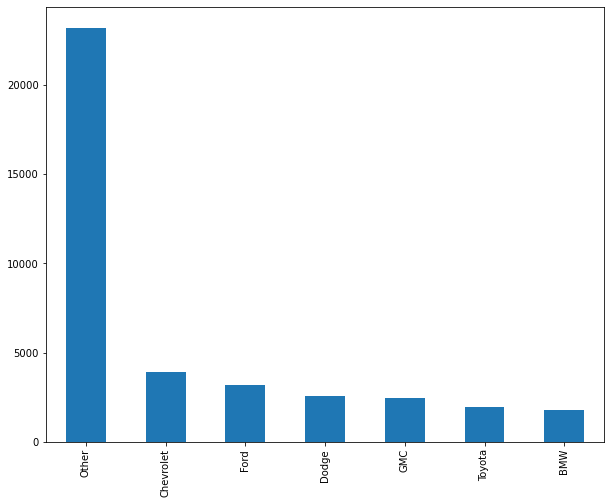

In [66]:
# 열을 요약해 상위 6개만 그래프 화
# fueleco.make.value_counts()

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 8))
top_n = fueleco.make.value_counts().index[:6]
(fueleco.assign(make=fueleco.make.where(fueleco.make.isin(top_n),
              'Other')).make.value_counts().plot.bar(ax=ax))
fig.savefig('c5-catpan.png', dpi=300)     # doctest: +SKIP

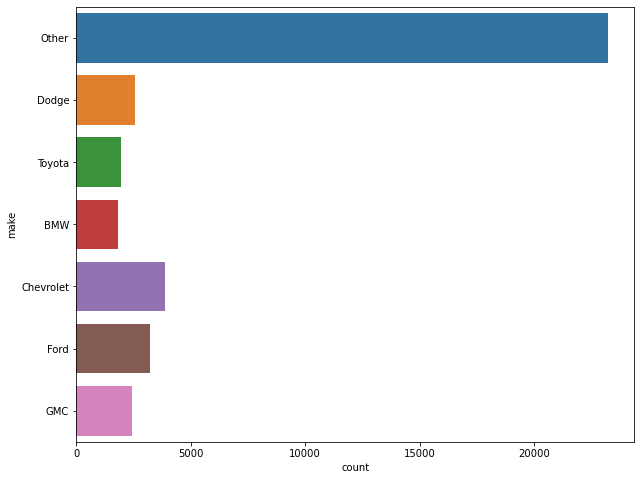

In [64]:
# seaborn ver

import seaborn as sns
fig, ax = plt.subplots(figsize=(10, 8))
top_n = fueleco.make.value_counts().index[:6]
sns.countplot(y='make',data= (fueleco.assign(make=fueleco.make.where(fueleco.make.isin(top_n),'Other'))))
fig.savefig('c5-catsns.png', dpi=300)

## 연속 데이터

In [67]:
fueleco.select_dtypes('number')

,barrels08,barrelsA08,...,phevHwy,phevComb
0,15.695714,0.0,...,0,0
1,29.964545,0.0,...,0,0
2,12.207778,0.0,...,0,0
3,29.964545,0.0,...,0,0
4,17.347895,0.0,...,0,0
...,...,...,...,...,...
39096,14.982273,0.0,...,0,0
39097,14.330870,0.0,...,0,0
39098,15.695714,0.0,...,0,0
39099,15.695714,0.0,...,0,0


In [68]:
fueleco.city08.sample(5, random_state=42)

4217     11
1736     21
36029    16
37631    16
1668     17
Name: city08, dtype: int64

In [69]:
fueleco.city08.isna().sum()

0

In [70]:
fueleco.city08.describe()

count    39101.00...
mean       18.077799
std         6.970672
min         6.000000
25%        15.000000
50%        17.000000
75%        20.000000
max       150.000000
Name: city08, dtype: float64

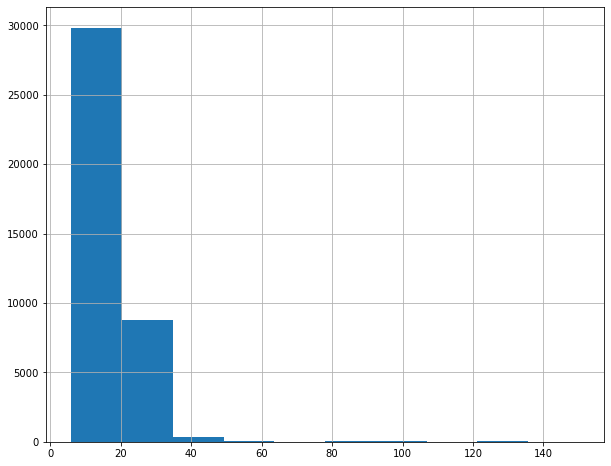

In [72]:
fig, ax = plt.subplots(figsize=(10, 8))
fueleco.city08.hist(ax=ax)
fig.savefig('c5-conthistpan.png', dpi=300)     # doctest: +SKIP

In [ ]:
# bins의 크기를 증가시킴
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 8))
fueleco.city08.hist(ax=ax, bins=30)
fig.savefig('c5-conthistpanbins.png', dpi=300)     # doctest: +SKIP

In [ ]:
# seaborn 버전
fig, ax = plt.subplots(figsize=(10, 8))
sns.distplot(fueleco.city08, rug=True, ax=ax)
fig.savefig('/tmp/c5-conthistsns.png', dpi=300)     # doctest: +SKIP

In [ ]:
# seaborn의 box plot, boxen plot, violin plot
fig, axs = plt.subplots(nrows=3, figsize=(10, 8))
sns.boxplot(fueleco.city08, ax=axs[0])
sns.violinplot(fueleco.city08, ax=axs[1])
sns.boxenplot(fueleco.city08, ax=axs[2])
fig.savefig('/tmp/c5-contothersns.png', dpi=300)     

In [ ]:
# 콜모고로프스미르노프 검증
# 안해도 될듯
from scipy import stats
stats.kstest(fueleco.city08, cdf='norm')

In [ ]:
# 안해도 될듯
fig, ax = plt.subplots(figsize=(10, 8))
stats.probplot(fueleco.city08, plot=ax)
fig.savefig('/tmp/c5-conprob.png', dpi=300)    

## 범주간의 연속 값 비교

In [ ]:
# 평균과 표준편차
mask = fueleco.make.isin(['Ford', 'Honda', 'Tesla', 'BMW'])
fueleco[mask].groupby('make').city08.agg(['mean', 'std'])

In [ ]:
# seaborn으로 시각화
g = sns.catplot(x='make', y='city08',data=fueleco[mask], kind='box')
g.ax.figure.savefig('/tmp/c5-catbox.png', dpi=300)     

In [ ]:
# col 매개변수를 사용하면 도표를 나눌 수 있다.
g = sns.catplot(x='make', y='city08', data=fueleco[mask], kind='box',col='year', col_order=[2012, 2014, 2016, 2018],col_wrap=2)
g.axes[0].figure.savefig('/tmp/c5-catboxcol.png', dpi=300)    # doctest: +SKIP  

In [ ]:
# hue 매개변수를 사용하면 col을 사용한 것 처럼 그래프를 나눌 필요없이 한번에 나타낼 수 있다.
g = sns.catplot(x='make', y='city08',data=fueleco[mask], kind='box',hue='year', hue_order=[2012, 2014, 2016, 2018])
g.ax.figure.savefig('/tmp/c5-catboxhue.png', dpi=300)    # doctest: +SKIP  

In [ ]:
# style.background_gradient(cmap='RdBu', axis=0)) 출력 스타일 지정
mask = fueleco.make.isin(['Ford', 'Honda', 'Tesla', 'BMW'])(fueleco[mask].groupby('make').city08.agg(['mean', 'std']).style.background_gradient(cmap='RdBu', axis=0))

## 두개의 연속 열 비교

In [ ]:
# 공분산 : 수치가 높을 수록 두 변수간의 관계가 높다
fueleco.city08.cov(fueleco.highway08)

In [ ]:
fueleco.city08.cov(fueleco.comb08)

In [ ]:
fueleco.city08.cov(fueleco.cylinders)

In [ ]:
# 피어슨 상관계수 : 공분산을 -1 ~ 1사이의 수로 변환
fueleco.city08.corr(fueleco.highway08)

In [ ]:
fueleco.city08.corr(fueleco.cylinders)

In [ ]:
# seaborn으로 도식화
fig, ax = plt.subplots(figsize=(8,8))
corr = fueleco[['city08', 'highway08', 'cylinders']].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask,
    fmt='.2f', annot=True, ax=ax, cmap='RdBu', vmin=-1, vmax=1,
    square=True)
fig.savefig('/tmp/c5-heatmap.png', dpi=300, bbox_inches='tight')

In [ ]:
# pandas로 산포도
fig, ax = plt.subplots(figsize=(8,8))
fueleco.plot.scatter(x='city08', y='highway08', alpha=.1, ax=ax)
fig.savefig('/tmp/c5-scatpan.png', dpi=300, bbox_inches='tight')

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
fueleco.plot.scatter(x='city08', y='cylinders', alpha=.1, ax=ax)
fig.savefig('/tmp/c5-scatpan-cyl.png', dpi=300, bbox_inches='tight')

In [ ]:
# Regresson을 추가
res = sns.lmplot(x='city08', y='highway08', data=fueleco)
res.fig.savefig('/tmp/c5-lmplot.png', dpi=300, bbox_inches='tight')

In [ ]:
# 도시 마일리지와 고속도로 마일리지사이의 강한 관계가 있다

## 범주 값과 범주 값 비교

In [ ]:
def generalize(ser, match_name, default):
    seen = None
    for match, name in match_name:
        mask = ser.str.contains(match)
        if seen is None:
            seen = mask
        else:
            seen |= mask
        ser = ser.where(~mask, name)
    ser = ser.where(seen, default)
    return ser

In [ ]:
makes = ['Ford', 'Tesla', 'BMW', 'Toyota']
data = (fueleco [fueleco.make.isin(makes)].assign(SClass=lambda df_: generalize(df_.VClass,[('Seaters', 'Car'), ('Car', 'Car'), ('Utility', 'SUV'),
     ('Truck', 'Truck'), ('Van', 'Van'), ('van', 'Van'), ('Wagon', 'Wagon')], 'other')))

In [ ]:
data.groupby(['make', 'SClass']).size().unstack()